In [1]:
import pathlib
import torch

from esm import FastaBatchedDataset, pretrained


# lets do PLS
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


/home/salaris/.conda/envs/cuda_torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np

In [3]:
# model_name = 'esm2_t33_650M_UR50D'
model_name = 'esm2_t6_8M_UR50D'


In [4]:
import os
import torch
import pandas as pd
rep_layer = 6 
def load_pt_files_to_dataframe(file_path, max_samples):
    df = pd.DataFrame(columns=["entry_id", "label", "mean_representation"])
    n = 0
    data = torch.load(file_path)
    return(data)

# def load_pt_files_to_dataframe(folder_path,max_samples, rep_layer = 6):
#     # Initialize an empty DataFrame
#     df = pd.DataFrame(columns=["entry_id", "label", "mean_representation"])
#     n = 0
#     # Loop through all files in the specified folder
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".pt"):
#             # Construct full file path
#             file_path = os.path.join(folder_path, filename)
#             # Load the PyTorch file (.pt)
#             data = torch.load(file_path)
            
# #             print(data)
#             # Append data to the DataFrame
#             newrow = pd.DataFrame({
#                 "entry_id": data["entry_id"],
#                 "label": data["label"],
#                 "mean_representation": [np.array(data["mean_representations"][rep_layer].tolist())]
#             })
#             df = pd.concat([df,newrow], ignore_index=True)
#             n += 1 
#         if n> max_samples:
#             break
#     print(f"number of samples process for {cas}: {n}")
#     return df

# Example usage
#folder_path = path
#dataframe = load_pt_files_to_dataframe(folder_path)
# print(dataframe)


In [5]:
caslist = ['cas1','cas2','cas3','cas4','cas5','cas6','cas7','cas8','cas9','cas10','cas11','cas12','cas13']


In [6]:
# training_list = []
# validation_list =[]
# for cas in caslist: 
    
#     casfolder = f"/home/salaris/protein_model/data/{cas}/"
    
#     training_fasta_file = pathlib.Path(casfolder + cas + '_training.fasta')
#     validation_fasta_file = pathlib.Path(casfolder + cas + '_validation.fasta')
    
#     training_embedding_folder = pathlib.Path(casfolder  + "_" +model_name + "_" + 'embeddings/' +  'training/')
#     validation_embedding_folder = pathlib.Path(casfolder  + "_" +model_name + "_" + 'embeddings/' +   'validation/')
#     print(training_embedding_folder, validation_embedding_folder)
#     print(training_fasta_file, validation_fasta_file)
   

#     _training_df = load_pt_files_to_dataframe(training_embedding_folder,max_samples=100)
#     _validation_df = load_pt_files_to_dataframe(validation_embedding_folder,max_samples=100)
#     training_list.append(_training_df)
#     validation_list.append(_validation_df)
#     training_df = pd.concat(training_list, ignore_index = True )
#     validation_df = pd.concat(validation_list, ignore_index = True )

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [7]:
do_raw = False 

# #for multiclass classification project:
if not do_raw:
    #finetuned model:
    # training_file_path = "/home/salaris/protein_model/data/all_data_20240704_14.csvtrain_test.csv_finetuned.torch.pt"
    # validation_file_path = "/home/salaris/protein_model/data/all_data_20240704_14.csvtfinal_validation.csv_finetuned.torch.pt"

    
    # training_file_path = "/home/salaris/protein_model/data/all_data_20240704_14.csvtrain_test.csvsolar-dew-10_finetuned.torch.pt"
    # validation_file_path = "/home/salaris/protein_model/data/all_data_20240704_14.csvtfinal_validation.csvsolar-dew-10_finetuned.torch.pt"

    #Mohammad:
    # training_file_path = "/home/salaris/protein_model/data_binary/all_data_20240712_05.csvtrain_test.csvsolar-dew-10_finetuned.torch.pt"
    # validation_file_path = "/home/salaris/protein_model/data_binary/all_data_20240712_05.csvtfinal_validation.csvsolar-dew-10_finetuned.torch.pt"

    #mohammad with 150M model:
    training_file_path ="/home/salaris/protein_model/data_binary/all_data_20240712_05.csvtrain_test.csvjolly-capybara-19_finetuned.torch.pt"
    validation_file_path ="/home/salaris/protein_model/data_binary/all_data_20240712_05.csvtfinal_validation.csvjolly-capybara-19_finetuned.torch.pt"

else:
    
    #raw model:
    training_file_path = "/home/salaris/protein_model/data/all_data_20240704_14.csvtrain_test.csv_raw.torch.pt"
    validation_file_path ="/home/salaris/protein_model/data/all_data_20240704_14.csvtfinal_validation.csv_raw.torch.pt"






In [8]:
training_data = load_pt_files_to_dataframe(training_file_path,0)
validation_data = load_pt_files_to_dataframe(validation_file_path,0)


In [9]:
# training_data


In [10]:
training_data.keys()

dict_keys(['seq', 'description', 'record_id', 'class', 'embeddings'])

In [11]:
training_embeddings = list(np.array(training_data['embeddings']))

training_data_dict = {'entry_id': training_data['record_id'], 'label': training_data['class'], 'mean_representation': training_embeddings}
training_df = pd.DataFrame(training_data_dict)


In [12]:
# training_df = training_df.sample(5000) #---> make it harder for the model to train 
print(training_df.shape)
training_df.shape

(63292, 3)


(63292, 3)

In [13]:
validation_embeddings = list(np.array(validation_data['embeddings']))

validation_data_dict = {'entry_id': validation_data['record_id'], 'label': validation_data['class'], 'mean_representation': validation_embeddings}
validation_df = pd.DataFrame(validation_data_dict)

In [14]:

# mn = training_df[training_df.entry_id == 'WP_234239993.1'].mean_representation
# y = mn.values[0]

In [15]:
import xgboost
from xgboost import XGBClassifier

/home/salaris/.conda/envs/cuda_torch/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


# build the model:

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,balanced_accuracy_score,f1_score,classification_report,roc_curve

from sklearn.preprocessing import LabelEncoder


# Example data loading
# Assuming 'df' is your DataFrame containing the features and the label
# df = pd.read_csv('path_to_your_data.csv')  # Load your data here

# Splitting the data into features and target
# Splitting the data into features and target
X = np.array(training_df['mean_representation'].tolist())
y = training_df['label']

# Encoding categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
# gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# modelx = GradientBoostingClassifier()
# modelx = RandomForestClassifier()
modelx= XGBClassifier()
# Train the model
modelx.fit(X_train, y_train)

# Predict on the testing set
y_pred = modelx.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
bacc = balanced_accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'balanced accuracy:{bacc}' )
print(f'f1 score:{f1}' )

print('Confusion Matrix:')
print(conf_mat)


Accuracy: 0.9988150722805909
balanced accuracy:0.96804791308462
f1 score:0.9988030045429216
Confusion Matrix:
[[  162    11]
 [    4 12482]]


In [17]:
from sklearn.metrics import classification_report


# final test of the validation data:

In [48]:
from sklearn.metrics import roc_curve,auc
import pylab as pl

In [19]:
accuracy

0.9988625053320063

In [87]:
x_test = validation_df['mean_representation'].to_list()
y_v = validation_df['label']
y_test = label_encoder.transform(y_v)
y_pred = modelx.predict(x_test)
y_prob = modelx.predict_proba(x_test)
y_pred = y_prob[:,1]>= .9
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
bacc = balanced_accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy: {accuracy}')
print(f'balanced accuracy:{bacc}' )
print(f'f1 score:{f1}' )

print('Confusion Matrix:')
print(conf_mat)

print(classification_report(y_test, y_pred,target_names=list(label_encoder.classes_)))


Accuracy: 0.9981515711645101
balanced accuracy:0.9795488565013455
f1 score:0.9981735617495204
Confusion Matrix:
[[  97    4]
 [   9 6923]]
               precision    recall  f1-score   support

    nr_cas13_       0.92      0.96      0.94       101
nr_non_cas13_       1.00      1.00      1.00      6932

     accuracy                           1.00      7033
    macro avg       0.96      0.98      0.97      7033
 weighted avg       1.00      1.00      1.00      7033



In [93]:
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

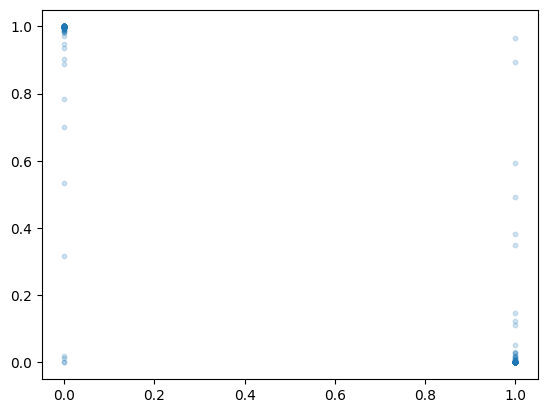

In [94]:
plt.scatter(y_test, y_prob[:,0],alpha = .2,s = 10)

In [40]:
CM = conf_mat
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("TN:",TN, "FN:",FN,"TP:",TP,"FP:",FP)

TN: 96 FN: 3 TP: 6929 FP: 5


In [20]:
torch.cuda.empty_cache()


In [21]:
# do pca on validation set:

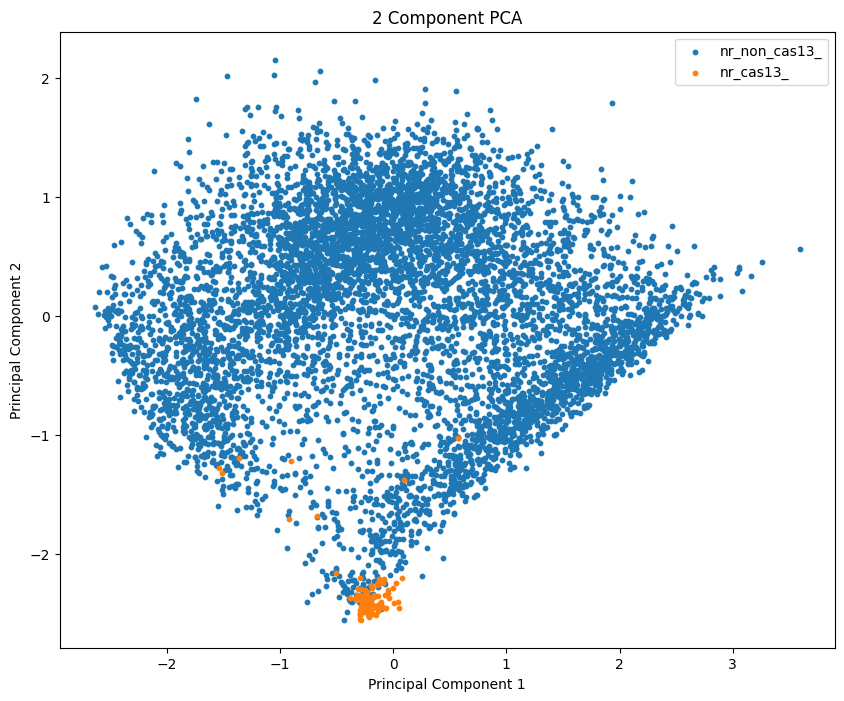

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x_test)

# Create a new DataFrame with principal components and labels
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2', 'principal_component_3','principal_component_4','principal_component_5'])
principal_df['label'] = label_encoder.inverse_transform(y_test) 


# Plotting
plt.figure(figsize=(10, 8))
for label in principal_df['label'].unique():
    indices_to_keep = principal_df['label'] == label
    plt.scatter(
        principal_df.loc[indices_to_keep, 'principal_component_1'],
        principal_df.loc[indices_to_keep, 'principal_component_2'],
        label=label,
        s=10
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.legend()
plt.show()

In [23]:
import tsne

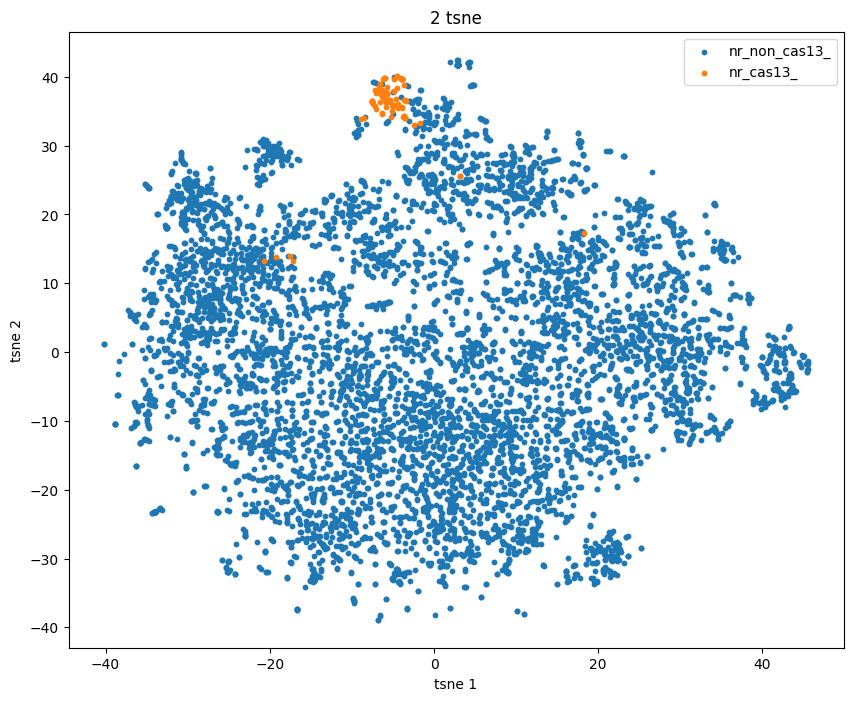

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

xx = np.array(x_test, dtype = 'float64') 
tsne_results = tsne.bh_sne(xx,random_state=np.random.seed(1))

# Create a new DataFrame with principal components and labels
principal_df = pd.DataFrame(data=tsne_results, columns=['tsne_1', 'tsne_2'])
principal_df['label'] = label_encoder.inverse_transform(y_test) 


# Plotting
plt.figure(figsize=(10, 8))
for label in principal_df['label'].unique():
    indices_to_keep = principal_df['label'] == label
    plt.scatter(
        principal_df.loc[indices_to_keep, 'tsne_1'],
        principal_df.loc[indices_to_keep, 'tsne_2'],
        label=label,
        s=10
    )

plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
plt.title('2 tsne')
plt.legend()
plt.show()

In [25]:
    #finetuned model:
    ft_validation_file_path = "/home/salaris/protein_model/data/all_data_20240704_14.csvtfinal_validation.csv_finetuned.torch.pt"
    #raw model:
    raw_validation_file_path ="/home/salaris/protein_model/data/all_data_20240704_14.csvtfinal_validation.csv_raw.torch.pt"

In [26]:
ft_df = pd.DataFrame(torch.load(ft_validation_file_path))
raw_df = pd.DataFrame(torch.load(raw_validation_file_path))

In [90]:

xgboost_model_path = "/home/salaris/protein_model/xgboost_model/"
os.makedirs(xgboost_model_path,exist_ok=True)

modelx.save_model(xgboost_model_path + "150M_xgboost_model.json")